In [2]:
using Random
using Plots
using Distributions
using AdaptiveSurveillance

┌ Info: Precompiling AdaptiveSurveillance [69006bd4-4c56-49bd-9558-74ccc455f1d0]
└ @ Base loading.jl:1278


In [3]:
const output_path = joinpath(dirname(pathof(AdaptiveSurveillance)), "..", "results", "tmp")
const L = 2
const p0 = [0.01, 0.02]#0.01 * ones(L)
const β = 4e-6 * 536 * 7
const p = repeat(prevalance_sequence(p0[1], β), 1, L)
const n = 200

200

In [37]:
ν = 1 / (26) # approx 6 months until there is an outbreak
Γd = [Geometric(ν) for l = 1:L]

2-element Array{Geometric{Float64},1}:
 Geometric{Float64}(p=0.038461538461538464)
 Geometric{Float64}(p=0.038461538461538464)

In [5]:
α = 1000 # the higher, the less false positives

1000

In [5]:
T = length(p[:, 1])
p_logistic(t) = max(p0[1], 1 / (1 + exp(β * 52 + -β * t + log((1 / p0[1] - 1))))); # analytical solution
pred_log = zeros(T)
for t = 1:T
    pred_log[t] = p_logistic(t)
end

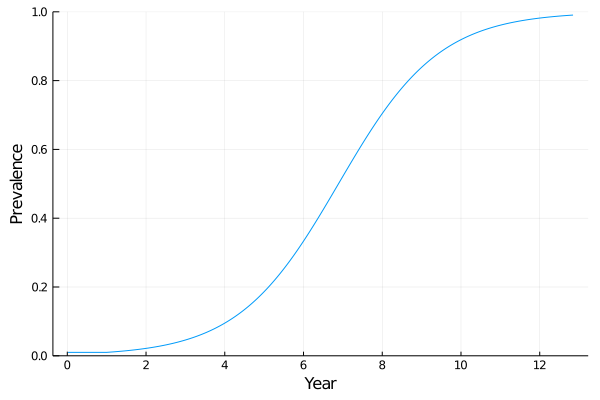

In [6]:
plot((1:T) ./ 52, pred_log, ylim=(0, 1), legend=false, xlabel = "Year", ylabel = "Prevalence")

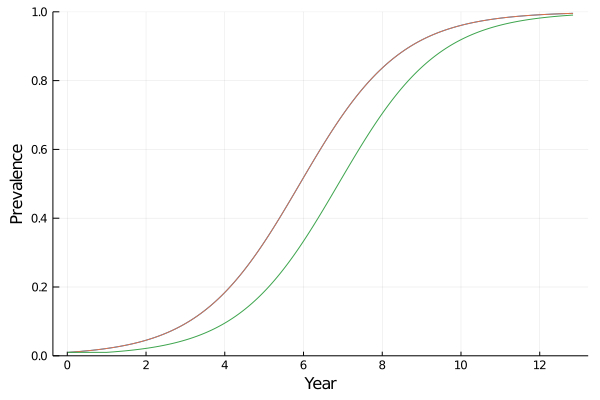

In [7]:
# Prevalance Sequence
plot((1:T)./52, hcat(p, pred_log), ylim=(0, 1), legend=false, xlabel = "Year", ylabel = "Prevalence")

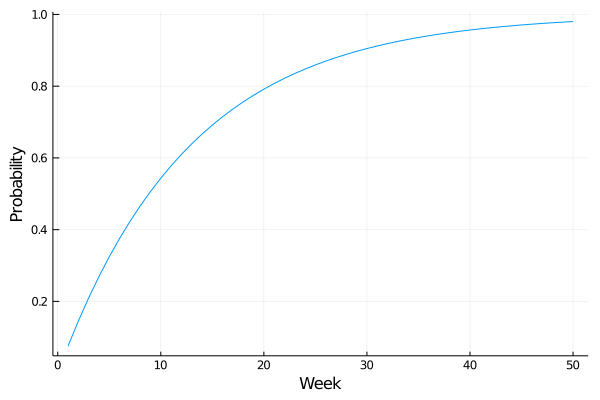

In [8]:
# Probability of any change point over time
Γd_all = Geometric(1 - prod(1 .- succprob.(Γd)))
plot(1:50, cdf.(Γd_all, 0:(49)), legend = false, ylabel = "Probability", xlabel = "Week")

In [43]:
# Debug
Γ = [typemax(Int64), 20]
beta_parameters = ones(L, 2)
recent_beta_parameters = ones(L, 2)
t, la, false_alarm, delay, test_data, locations_visited, ntimes_visisted, locations_visited, z, w = replication(
    L, Γ, p0, p, n,
    astat_isotonic, α, tpolicy_evsi, tstate_evsi(Γd, beta_parameters, recent_beta_parameters),
    rng1 = MersenneTwister(1), rng2 = MersenneTwister(2), maxiters = 1000);

0.00015288742541040782
t = 5, tprime = 2, l = 1, times_visited = 2
t = 5, tprime = 2, l = 1, prior_change = 0.07544378698224853
t = 5, tprime = 2, l = 1, prior_int_change = 0.06975202198802564
t = 5, tprime = 2, l = 1, prior_no_change = 0.8548041910297258
t = 5, tprime = 2, l = 1, likely_no_change = 0.5
t = 5, tprime = 2, l = 1, posterior_p_no_change = 0.8548041910297258
t = 5, tprime = 2, l = 1, dC = BetaBinomial{Float64}(n=200, α=2.0, β=200.0)
t = 5, tprime = 2, l = 1, probability_alarm = 0.009756460263596556

0.00020043246425170124
t = 5, tprime = 4, l = 2, times_visited = 2
t = 5, tprime = 4, l = 2, prior_change = 0.14519580897027418
t = 5, tprime = 4, l = 2, prior_int_change = 0.0
t = 5, tprime = 4, l = 2, prior_no_change = 0.8548041910297258
t = 5, tprime = 4, l = 2, likely_no_change = 0.5
t = 5, tprime = 4, l = 2, posterior_p_no_change = 0.8548041910297258
t = 5, tprime = 4, l = 2, dC = BetaBinomial{Float64}(n=200, α=9.0, β=193.0)
t = 5, tprime = 4, l = 2, probability_alarm = 0.

t = 14, tprime = 13, l = 2, prior_int_change = 0.0
t = 14, tprime = 13, l = 2, prior_no_change = 0.6005740861346783
t = 14, tprime = 13, l = 2, likely_no_change = 0.44197845251845824
t = 14, tprime = 13, l = 2, posterior_p_no_change = 0.543569532424866
t = 14, tprime = 13, l = 2, dC = BetaBinomial{Float64}(n=200, α=7.0, β=195.0)
t = 14, tprime = 13, l = 2, probability_alarm = 0.0041834046622900405

0.00018883627428685194
t = 15, tprime = 14, l = 1, times_visited = 8
t = 15, tprime = 14, l = 1, prior_change = 0.4225249171781939
t = 15, tprime = 14, l = 1, prior_int_change = 0.0
t = 15, tprime = 14, l = 1, prior_no_change = 0.577475082821806
t = 15, tprime = 14, l = 1, likely_no_change = 0.21799939886935818
t = 15, tprime = 14, l = 1, posterior_p_no_change = 0.2758889510353511
t = 15, tprime = 14, l = 1, dC = BetaBinomial{Float64}(n=200, α=3.0, β=199.0)
t = 15, tprime = 14, l = 1, probability_alarm = 0.005547389423401002

9.009259981485042e-5
t = 15, tprime = 13, l = 2, times_visited = 6

t = 24, tprime = 22, l = 1, prior_change = 0.5780446133493968
t = 24, tprime = 22, l = 1, prior_int_change = 0.016229053332715515
t = 24, tprime = 22, l = 1, prior_no_change = 0.40572633331788766
t = 24, tprime = 22, l = 1, likely_no_change = 0.4074981936723931
t = 24, tprime = 22, l = 1, posterior_p_no_change = 0.3213848430270685
t = 24, tprime = 22, l = 1, dC = BetaBinomial{Float64}(n=200, α=2.0, β=200.0)
t = 24, tprime = 22, l = 1, probability_alarm = 0.01254514795693133

4.365102567309768e-5
t = 24, tprime = 23, l = 2, times_visited = 11
t = 24, tprime = 23, l = 2, prior_change = 0.5942736666821123
t = 24, tprime = 23, l = 2, prior_int_change = 0.0
t = 24, tprime = 23, l = 2, prior_no_change = 0.40572633331788766
t = 24, tprime = 23, l = 2, likely_no_change = 0.6016615140436081
t = 24, tprime = 23, l = 2, posterior_p_no_change = 0.5076823583651539
t = 24, tprime = 23, l = 2, dC = BetaBinomial{Float64}(n=200, α=3.0, β=199.0)
t = 24, tprime = 23, l = 2, probability_alarm = 0.00031377

t = 33, tprime = 31, l = 2, times_visited = 13
t = 33, tprime = 31, l = 2, prior_change = 0.7035397423332493
t = 33, tprime = 31, l = 2, prior_int_change = 0.01140231760256738
t = 33, tprime = 31, l = 2, prior_no_change = 0.2850579400641833
t = 33, tprime = 31, l = 2, likely_no_change = 0.6066903926190115
t = 33, tprime = 31, l = 2, posterior_p_no_change = 0.3787863206301387
t = 33, tprime = 31, l = 2, dC = BetaBinomial{Float64}(n=200, α=3.0, β=199.0)
t = 33, tprime = 31, l = 2, probability_alarm = 0.006970387218564581

6.302658359124952e-5
t = 34, tprime = 33, l = 1, times_visited = 20
t = 34, tprime = 33, l = 1, prior_change = 0.7259058268613623
t = 34, tprime = 33, l = 1, prior_int_change = 0.0
t = 34, tprime = 33, l = 1, prior_no_change = 0.27409417313863776
t = 34, tprime = 33, l = 1, likely_no_change = 0.13511058334063075
t = 34, tprime = 33, l = 1, posterior_p_no_change = 0.05570037560814935
t = 34, tprime = 33, l = 1, dC = BetaBinomial{Float64}(n=200, α=5.0, β=197.0)
t = 34, tp

t = 42, tprime = 37, l = 2, probability_alarm = 0.027953327149078028

1.2665734632029305e-5
t = 43, tprime = 42, l = 1, times_visited = 27
t = 43, tprime = 42, l = 1, prior_change = 0.8074250696533456
t = 43, tprime = 42, l = 1, prior_int_change = 0.0
t = 43, tprime = 42, l = 1, prior_no_change = 0.19257493034665435
t = 43, tprime = 42, l = 1, likely_no_change = 0.15878940053734789
t = 43, tprime = 42, l = 1, posterior_p_no_change = 0.043081350729916215
t = 43, tprime = 42, l = 1, dC = BetaBinomial{Float64}(n=200, α=4.0, β=198.0)
t = 43, tprime = 42, l = 1, probability_alarm = 0.03299704050586922

8.613357540133793e-6
t = 43, tprime = 37, l = 2, times_visited = 15
t = 43, tprime = 37, l = 2, prior_change = 0.7657031520642651
t = 43, tprime = 37, l = 2, prior_int_change = 0.041721917589080504
t = 43, tprime = 37, l = 2, prior_no_change = 0.19257493034665435
t = 43, tprime = 37, l = 2, likely_no_change = 0.5844190327257965
t = 43, tprime = 37, l = 2, posterior_p_no_change = 0.24727480306

t = 52, tprime = 51, l = 1, dC = BetaBinomial{Float64}(n=200, α=5.0, β=197.0)
t = 52, tprime = 51, l = 1, probability_alarm = 0.06847559445003486

1.005024614300033e-5
t = 52, tprime = 50, l = 2, times_visited = 19
t = 52, tprime = 50, l = 2, prior_change = 0.8592873846667604
t = 52, tprime = 50, l = 2, prior_int_change = 0.005412023666663046
t = 52, tprime = 50, l = 2, prior_no_change = 0.1353005916665766
t = 52, tprime = 50, l = 2, likely_no_change = 0.5892633652316289
t = 52, tprime = 50, l = 2, posterior_p_no_change = 0.1829213998883646
t = 52, tprime = 50, l = 2, dC = BetaBinomial{Float64}(n=200, α=4.0, β=198.0)
t = 52, tprime = 50, l = 2, probability_alarm = 0.00786336398247946

9.920254255105061e-6
t = 53, tprime = 52, l = 1, times_visited = 33
t = 53, tprime = 52, l = 1, prior_change = 0.8699032772436763
t = 53, tprime = 52, l = 1, prior_int_change = 0.0
t = 53, tprime = 52, l = 1, prior_no_change = 0.13009672275632367
t = 53, tprime = 52, l = 1, likely_no_change = 0.2099086071

t = 61, tprime = 58, l = 2, posterior_p_no_change = 0.18153532011289508
t = 61, tprime = 58, l = 2, dC = BetaBinomial{Float64}(n=200, α=1.0, β=201.0)
t = 61, tprime = 58, l = 2, probability_alarm = 0.005946036245603578

3.846799905126957e-6
t = 62, tprime = 61, l = 1, times_visited = 40
t = 62, tprime = 61, l = 1, prior_change = 0.9085957682491304
t = 62, tprime = 61, l = 1, prior_int_change = 0.0
t = 62, tprime = 61, l = 1, prior_no_change = 0.09140423175086962
t = 62, tprime = 61, l = 1, likely_no_change = 0.4266228433530483
t = 62, tprime = 61, l = 1, posterior_p_no_change = 0.06963874383897145
t = 62, tprime = 61, l = 1, dC = BetaBinomial{Float64}(n=200, α=1.0, β=201.0)
t = 62, tprime = 61, l = 1, probability_alarm = 0.00035240878191794735

5.085128045405698e-6
t = 62, tprime = 58, l = 2, times_visited = 21
t = 62, tprime = 58, l = 2, prior_change = 0.8971826702557898
t = 62, tprime = 58, l = 2, prior_int_change = 0.01141309799334056
t = 62, tprime = 58, l = 2, prior_no_change = 0.

t = 71, tprime = 70, l = 1, likely_no_change = 0.3371588584283355
t = 71, tprime = 70, l = 1, posterior_p_no_change = 0.03372996135486902
t = 71, tprime = 70, l = 1, dC = BetaBinomial{Float64}(n=200, α=6.0, β=196.0)
t = 71, tprime = 70, l = 1, probability_alarm = 0.13017954226842696

3.6954716960784664e-6
t = 71, tprime = 68, l = 2, times_visited = 27
t = 71, tprime = 68, l = 2, prior_change = 0.9305402960904645
t = 71, tprime = 68, l = 2, prior_int_change = 0.005240303105601085
t = 71, tprime = 68, l = 2, prior_no_change = 0.06421940080393441
t = 71, tprime = 68, l = 2, likely_no_change = 0.6647110333651204
t = 71, tprime = 68, l = 2, posterior_p_no_change = 0.11918162213102598
t = 71, tprime = 68, l = 2, dC = BetaBinomial{Float64}(n=200, α=3.0, β=199.0)
t = 71, tprime = 68, l = 2, probability_alarm = 0.00569148850598636

1.0353275346536642e-5
t = 72, tprime = 71, l = 1, times_visited = 44
t = 72, tprime = 71, l = 1, prior_change = 0.938250576150063
t = 72, tprime = 71, l = 1, prior_i

t = 80, tprime = 79, l = 2, prior_no_change = 0.045119699171664814
t = 80, tprime = 79, l = 2, likely_no_change = 0.3589292272269846
t = 80, tprime = 79, l = 2, posterior_p_no_change = 0.025773884346272022
t = 80, tprime = 79, l = 2, dC = BetaBinomial{Float64}(n=200, α=8.0, β=194.0)
t = 80, tprime = 79, l = 2, probability_alarm = 0.11452539272969647

4.439661635204531e-6
t = 81, tprime = 78, l = 1, times_visited = 47
t = 81, tprime = 78, l = 1, prior_change = 0.9530755128614685
t = 81, tprime = 78, l = 1, prior_int_change = 0.003540161011930665
t = 81, tprime = 78, l = 1, prior_no_change = 0.04338432612660079
t = 81, tprime = 78, l = 1, likely_no_change = 0.7059353559496021
t = 81, tprime = 78, l = 1, posterior_p_no_change = 0.09772611264848753
t = 81, tprime = 78, l = 1, dC = BetaBinomial{Float64}(n=200, α=2.0, β=200.0)
t = 81, tprime = 78, l = 1, probability_alarm = 0.005388653512747354

2.01012388528552e-6
t = 81, tprime = 80, l = 2, times_visited = 33
t = 81, tprime = 80, l = 2, pr

t = 90, tprime = 85, l = 1, prior_int_change = 0.005177501583365385
t = 90, tprime = 85, l = 1, prior_no_change = 0.030481252068575822
t = 90, tprime = 85, l = 1, likely_no_change = 0.7418400341135808
t = 90, tprime = 85, l = 1, posterior_p_no_change = 0.08210459683925855
t = 90, tprime = 85, l = 1, dC = BetaBinomial{Float64}(n=200, α=2.0, β=200.0)
t = 90, tprime = 85, l = 1, probability_alarm = 0.006929668978925031

NaN
t = 90, tprime = 89, l = 2, times_visited = 39
t = 90, tprime = 89, l = 2, prior_change = 0.9695187479314242
t = 90, tprime = 89, l = 2, prior_int_change = 0.0
t = 90, tprime = 89, l = 2, prior_no_change = 0.030481252068575822
t = 90, tprime = 89, l = 2, likely_no_change = 0.23772686565651807
t = 90, tprime = 89, l = 2, posterior_p_no_change = 0.00970972114060222
t = 90, tprime = 89, l = 2, dC = BetaBinomial{Float64}(n=200, α=8.0, β=194.0)
t = 90, tprime = 89, l = 2, probability_alarm = NaN

3.0189294661337075e-6
t = 91, tprime = 85, l = 1, times_visited = 50
t = 91, t

t = 99, tprime = 98, l = 2, dC = BetaBinomial{Float64}(n=200, α=9.0, β=193.0)
t = 99, tprime = 98, l = 2, probability_alarm = NaN

2.1210597985536232e-6
t = 100, tprime = 85, l = 1, times_visited = 50
t = 100, tprime = 85, l = 1, prior_change = 0.9643412463480588
t = 100, tprime = 85, l = 1, prior_int_change = 0.015066711933464094
t = 100, tprime = 85, l = 1, prior_no_change = 0.020592041718477085
t = 100, tprime = 85, l = 1, likely_no_change = 0.7418400341135808
t = 100, tprime = 85, l = 1, posterior_p_no_change = 0.055466923720491015
t = 100, tprime = 85, l = 1, dC = BetaBinomial{Float64}(n=200, α=2.0, β=200.0)
t = 100, tprime = 85, l = 1, probability_alarm = 0.015959165300165737

NaN
t = 100, tprime = 99, l = 2, times_visited = 49
t = 100, tprime = 99, l = 2, prior_change = 0.9794079582815229
t = 100, tprime = 99, l = 2, prior_int_change = 0.0
t = 100, tprime = 99, l = 2, prior_no_change = 0.020592041718477085
t = 100, tprime = 99, l = 2, likely_no_change = 0.014941674571449315
t = 

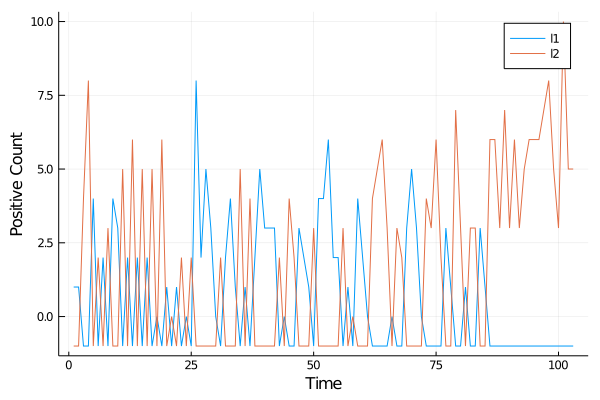

In [39]:
plot(1:(t-1), test_data[1:(t-1), :], xlabel = "Time", ylabel = "Positive Count", labels = ["l1" "l2" "l3"])

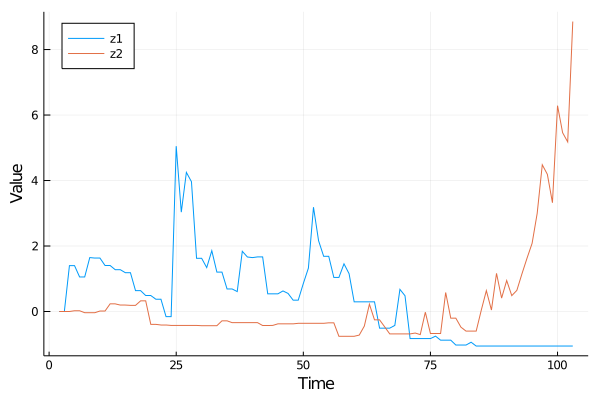

In [40]:
plot(2:(t-1), z[3:t, :], xlabel = "Time", ylabel = "Value", 
    label = permutedims(["z$l" for l = 1:L]), legend=:topleft)

In [37]:
# Alarm time distribution
atd_T = 200
atd_0 = alarm_time_distribution(Int(1e4), L, Γd, zeros(Int64, L), p0, p, n, astat_isotonic, α, 
    tpolicy_constant, tstate_const(2), maxiters=atd_T);
atd_0 = cumsum(atd_0) ./ sum(atd_0);

In [38]:
atd_1 = alarm_time_distribution(Int(1e4), L, Γd, ones(Int64, L) * typemax(Int64), p0, p, n, astat_isotonic, α, 
    tpolicy_constant, tstate_const(2), maxiters=atd_T);
atd_1 = cumsum(atd_1) ./ sum(atd_1);

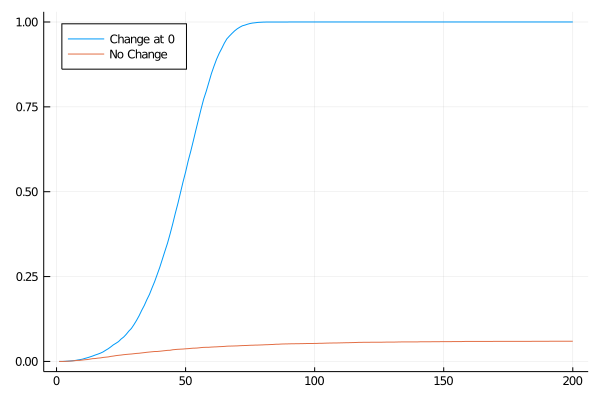

In [39]:
plot(1:atd_T, hcat(atd_0[1:atd_T], atd_1[1:atd_T]), label = ["Change at 0" "No Change"], legend=:topleft)

In [9]:
# Probability of successful detection
T_end = 21

21

In [ ]:
sp2s, hw2s = probability_successfull_detection_l(Int(1e4), T_end, 47, 1, L, p0, p, n, astat_isotonic, α,
    tpolicy_constant, tstate_const(1));
sp3s, hw3s = probability_successfull_detection_l(Int(1e4), T_end, 75, 1, L, p0, p, n, astat_isotonic, α,
    tpolicy_constant, tstate_const(1));

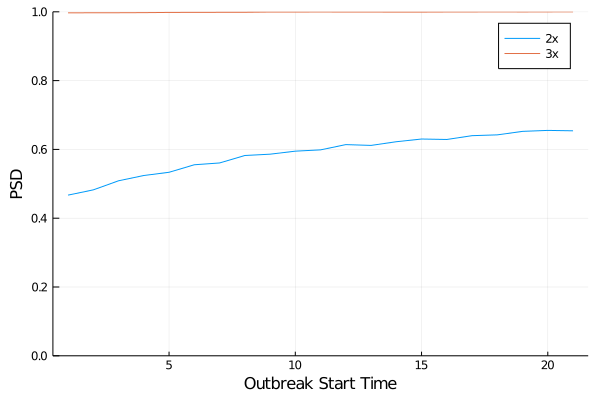

In [39]:
plot(1:T_end, hcat(sp2s, sp3s), label = ["2x" "3x"], xlabel = "Outbreak Start Time", ylabel = "PSD", ylim=(0, 1.0))

In [40]:
sp2r, hw2r = probability_successfull_detection_l(Int(1e4), T_end, 47, 1, L, p0, p, n, astat_isotonic, α,
    tpolicy_random, nothing);
sp3r, hw3r = probability_successfull_detection_l(Int(1e4), T_end, 75, 1, L, p0, p, n, astat_isotonic, α,
    tpolicy_random, nothing);

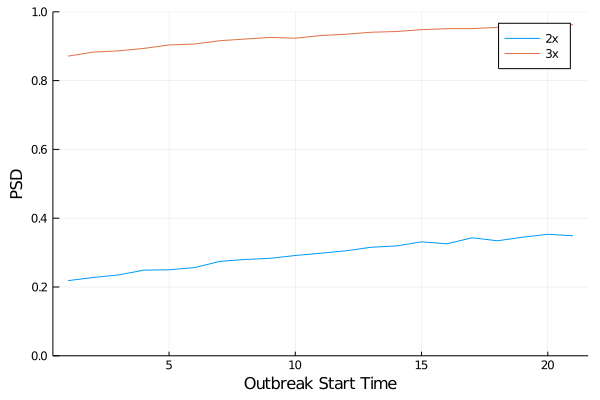

In [41]:
plot(1:T_end, hcat(sp2r, sp3r), label = ["2x" "3x"], xlabel = "Outbreak Start Time", ylabel = "PSD", ylim=(0, 1.0))

In [10]:
# thompson sampling
sp2ts, hw2ts = probability_successfull_detection_l(Int(1e4), T_end, 47, 1, L, p0, p, n, astat_isotonic, α,
    tpolicy_thompson, tstate_thompson(ones(L, 2)));
sp3ts, hw3ts = probability_successfull_detection_l(Int(1e4), T_end, 75, 1, L, p0, p, n, astat_isotonic, α,
    tpolicy_thompson, tstate_thompson(ones(L, 2)));

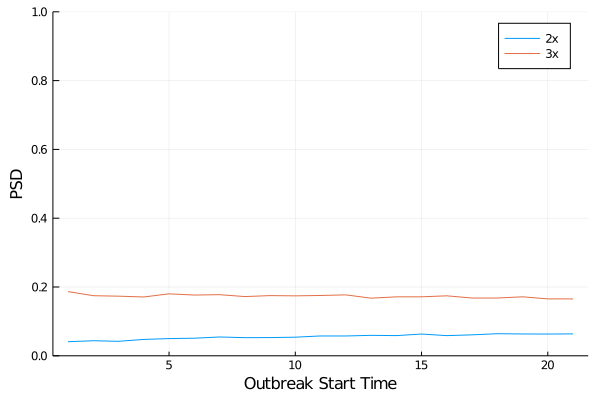

In [11]:
plot(1:T_end, hcat(sp2ts, sp3ts), label = ["2x" "3x"], xlabel = "Outbreak Start Time", ylabel = "PSD", ylim=(0, 1.0))

In [12]:
sp2vi, hw2vi = probability_successfull_detection_l(Int(1e4), T_end, 47, 1, L, p0, p, n, astat_isotonic, α,
    tpolicy_evsi, tstate_evsi(Γd, ones(L, 2), ones(L, 2)));
sp3vi, hw3vi = probability_successfull_detection_l(Int(1e4), T_end, 75, 1, L, p0, p, n, astat_isotonic, α,
    tpolicy_evsi, tstate_evsi(Γd, ones(L, 2), ones(L, 2)));

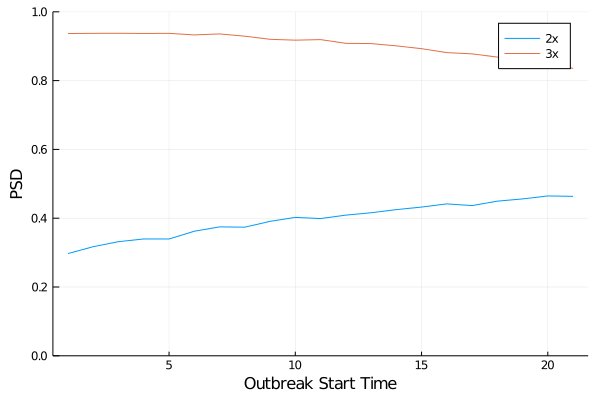

In [13]:
plot(1:T_end, hcat(sp2vi, sp3vi), label = ["2x" "3x"], xlabel = "Outbreak Start Time", ylabel = "PSD", ylim=(0, 1.0))

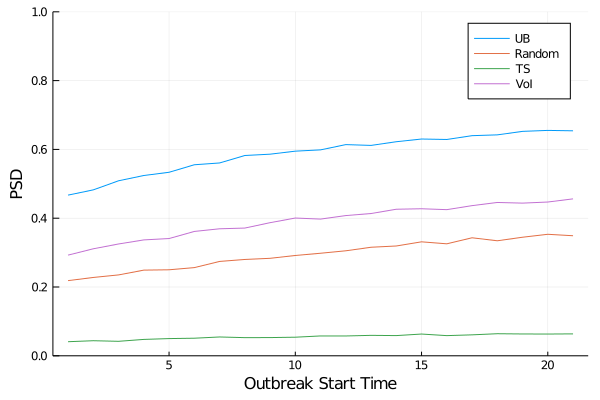

In [45]:
plot(1:T_end, hcat(sp2s, sp2r, sp2ts, sp2vi), label = ["UB" "Random" "TS" "VoI"], xlabel = "Outbreak Start Time", ylabel = "PSD", ylim=(0, 1.0))

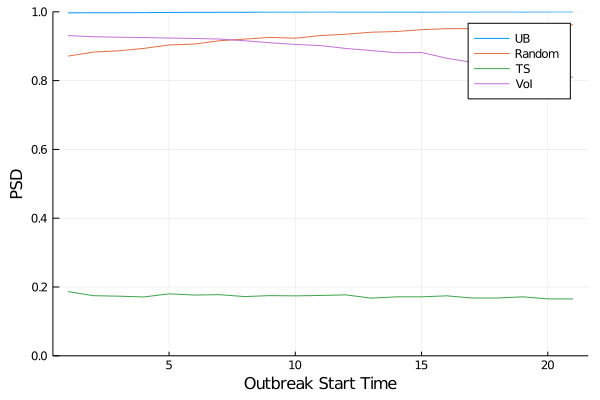

In [52]:
plot(1:T_end, hcat(sp3s, sp3r, sp3ts, sp3vi), label = ["UB" "Random" "TS" "VoI"], xlabel = "Outbreak Start Time", ylabel = "PSD", ylim=(0, 1.0))

In [13]:
sp3ts

LoadError: UndefVarError: sp3ts not defined

In [23]:
t1 = tstate_thompson(ones(L, 2))
t2 = deepcopy(t1)

tstate_thompson([1.0 1.0; 1.0 1.0])

In [24]:
t1.beta_parameters[1,1]=5

5

In [25]:
t1

tstate_thompson([5.0 1.0; 1.0 1.0])

In [26]:
t2

tstate_thompson([1.0 1.0; 1.0 1.0])

In [39]:
lr(nu, t) = exp(logccdf(Geometric(nu), t - 1) - logcdf(Geometric(nu), t - 1))

lr (generic function with 1 method)

In [42]:
nu = 0.0001
lr_plot = zeros(1000)
for t = 1:1000
    lr_plot[t] = lr(nu, t)
end

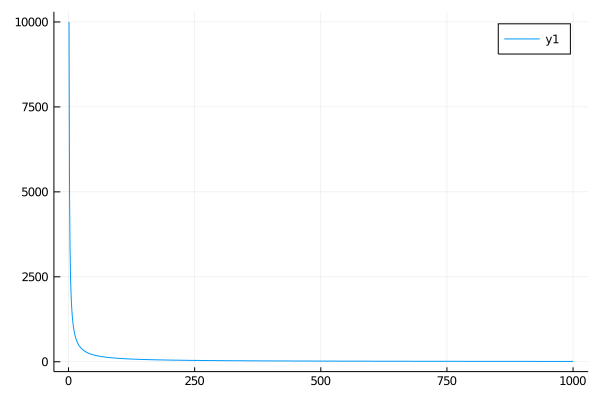

In [43]:
plot(lr_plot)

In [49]:
lr(1e-10, 1000)

9.999999499500005e6

In [51]:
f(p) = log(1 - p) - log(p)
ps = [f(p) for p = 0.01:0.01:0.9]

90-element Array{Float64,1}:
  4.59511985013459
  3.8918202981106265
  3.4760986898352733
  3.1780538303479453
  2.9444389791664403
  2.751535313041949
  2.5866893440979424
  2.4423470353692047
  2.313634929180631
  2.197224577336219
  2.090741096933769
  1.992430164690206
  1.900958761193047
  ⋮
 -1.3249254147435987
 -1.3862943611198908
 -1.4500101755059986
 -1.5163474893680882
 -1.5856272637403814
 -1.6582280766035322
 -1.7346010553881062
 -1.8152899666382492
 -1.900958761193047
 -1.992430164690206
 -2.0907410969337694
 -2.1972245773362196

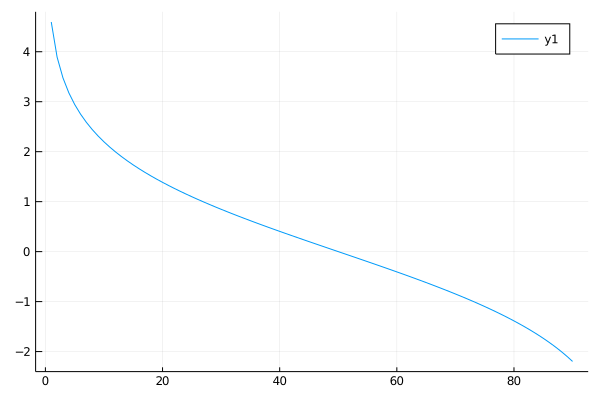

In [52]:
plot(ps)